<h1 align='center'><b>
<font size='25'>
Crack Detection in Concrete</font></b>
</h1>



## Introduction


Cracks on the concrete surface are one of the earliest indications of degradation of the structure which is critical for the maintenance as well the continuous exposure will lead to the severe damage to the environment.
So, We will use pre-trained models on a dataset of 40,000 images where 20,000 are Damaged and other 20,000 are not Damaged

Training Images : **30,000**

Validation Images : **9,500**

Testing Images : **500**

|-----|Train|-----|Valid|-----|Test|-----|

|-----|75%|-----|23.75%|-----|1.25%|-----|

## Table of Contents


<font size = 3>    

1. Downloading Data
2. Visualizing Data
3. Training and Validation
4. Testing
 

</font>
    
</div>

## Download Data

The <code>wget</code> command to download the data from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2020-03-20 12:51:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip’

concrete_data_week4 100%[===================>] 249.37M  29.5MB/s    in 8.4s    

2020-03-20 12:52:02 (29.5 MB/s) - ‘concrete_data_week4.zip’ saved [261483817/261483817]



In [0]:
!unzip -q concrete_data_week4.zip

After unzipping the data, you will find the data has already been divided into a train, validation, and test sets.

## Visualizing Data

Negative : **Doesn't Contain Crack**

Positive : **Contains Crack**

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [4]:
negative_images = sorted(os.listdir('concrete_data_week4/train/negative'))[2:]
print(negative_images[:5])
positive_images = sorted(os.listdir('concrete_data_week4/train/positive'))[1:]
positive_images[:5]

['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg']


['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg']

In [5]:
print('Shape of Images : ',end='')
np.array(Image.open(f'concrete_data_week4/train/negative/{positive_images[1]}')).shape

Shape of Images : 

(227, 227, 3)

### Images with Crack

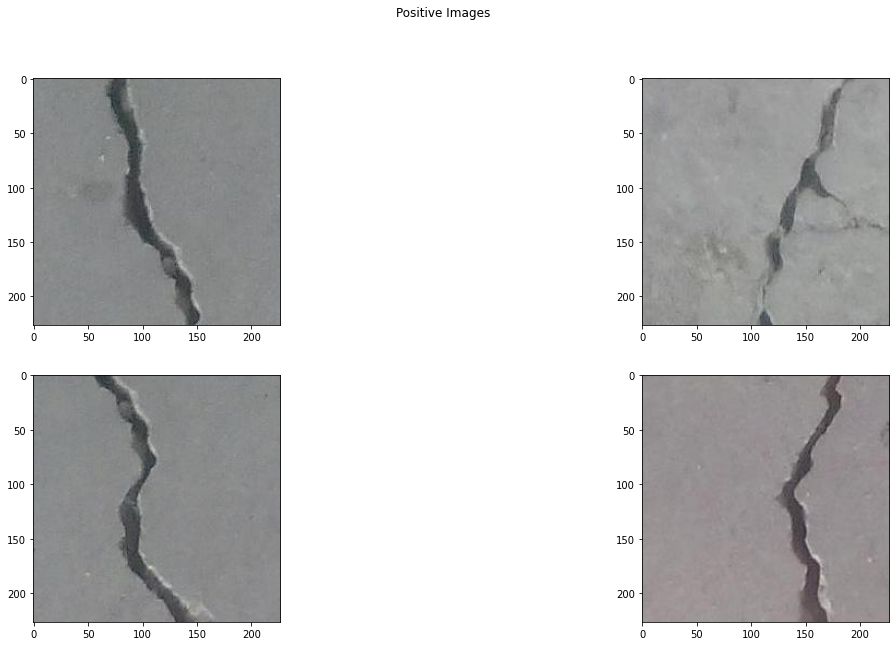

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) 
idx = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = Image.open(f'concrete_data_week4/train/positive/{positive_images[idx]}')
        ax2.imshow(image_data)
        idx += 1

fig.suptitle('Positive Images') 
plt.show()

### Images without Crack

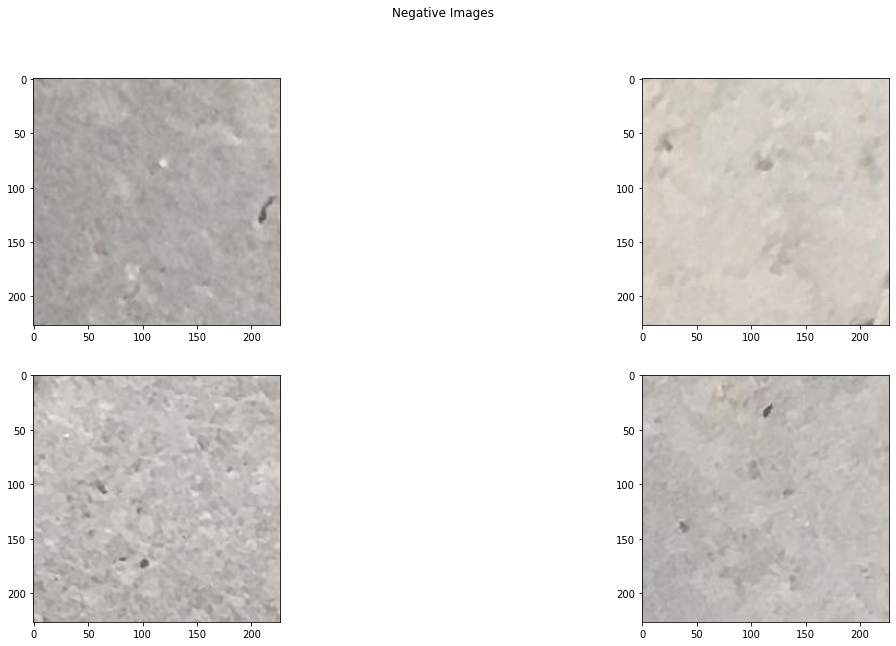

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) 
idx = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = Image.open(f'concrete_data_week4/train/negative/{negative_images[idx]}')
        ax2.imshow(image_data)
        idx += 1

fig.suptitle('Negative Images') 
plt.show()


## Training and Validation

We will design a classifiers using the VGG16 pre-trained model.

In [8]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [0]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [10]:
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.
Found 9501 images belonging to 2 classes.


In [11]:
model = Sequential()
model.add(VGG16(
    include_top=False,
    pooling='max',
    weights='imagenet',
    ))
model.add(Dense(10,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False
model.summary()





58892288/58889256 [==============================] - 2s 0us/step






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 14,719,840
Trainable params: 5,152
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 10

In [14]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
301/301 [==============================] - 109s 364ms/step - loss: 0.0922 - acc: 0.9800 - val_loss: 0.0228 - val_acc: 0.9951
Epoch 2/10
301/301 [==============================] - 100s 332ms/step - loss: 0.0152 - acc: 0.9965 - val_loss: 0.0199 - val_acc: 0.9958
Epoch 3/10
301/301 [==============================] - 101s 336ms/step - loss: 0.0089 - acc: 0.9977 - val_loss: 0.0246 - val_acc: 0.9947
Epoch 4/10
301/301 [==============================] - 100s 333ms/step - loss: 0.0067 - acc: 0.9983 - val_loss: 0.0139 - val_acc: 0.9971
Epoch 5/10
301/301 [==============================] - 100s 333ms/step - loss: 0.0056 - acc: 0.9986 - val_loss: 0.0133 - val_acc: 0.9966
Epoch 6/10
301/301 [==============================] - 101s 336ms/step - loss: 0.0042 - acc: 0.9993 - val_loss: 0.0149 - val_acc: 0.9969
Epoch 7/10
301/301 [==============================] - 101s 335ms/step - loss: 0.0036 - a

In [0]:
epoch=fit_history.epoch
history=fit_history.history


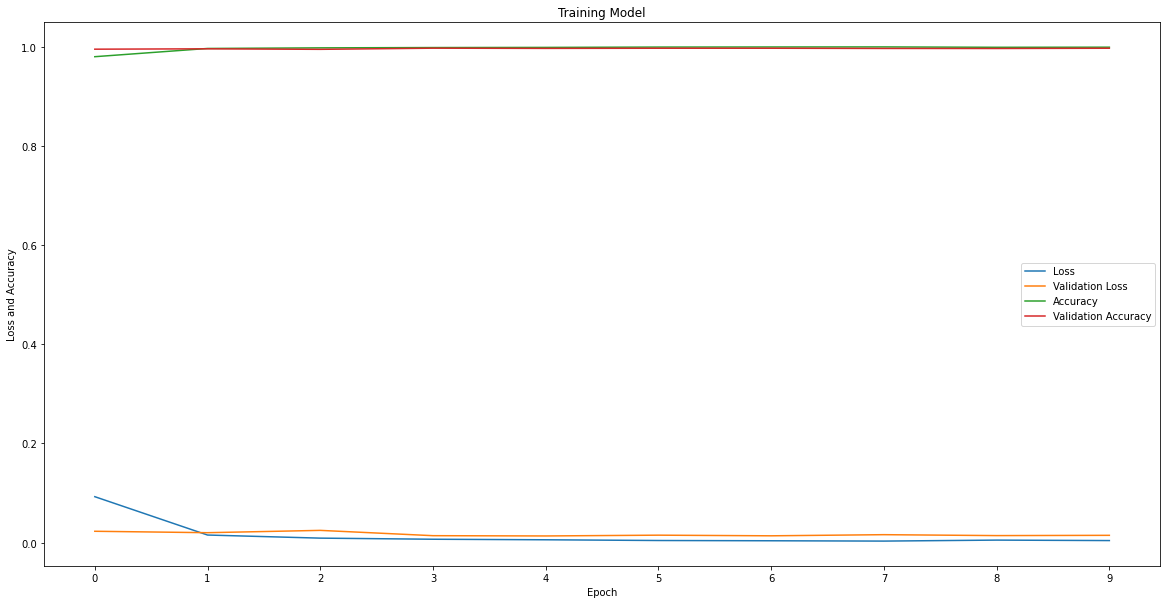

In [16]:
plt.figure(1,figsize=(20,10))
plt.plot(history['loss'], label='Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.plot(history['acc'], label='Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training Model')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch')
plt.xticks(ticks=epoch,labels=epoch)
plt.legend()
plt.show()

## Testing

Finding Loss and Accuracy on Testing Data

In [17]:
test_generator=data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    shuffle=True,
    class_mode='categorical')

Found 500 images belonging to 2 classes.


In [0]:
score=model.evaluate_generator(test_generator, verbose=0)

In [19]:
print(f'-----------VGG16-----------\nLoss:{score[0]}\nAccuracy:{score[1]}')

-----------VGG16-----------
Loss:0.0016756769124185666
Accuracy:1.0


We can get Predictions from model for Testing Data.

In [0]:
preds=model.predict_generator(test_generator, verbose=0)

In [21]:
for pred in preds[:5]:
  if pred[0]>=pred[1]:
    print('Negative')
  else:
    print('Positive')

Positive
Negative
Positive
Positive
Negative


  We can save our model for further use.

In [0]:
model.save('model_vgg.h5')